# **Finanzas Computacionales**

# **Taller 3**

### *Juan Esteban Gonzalez - David Gonzalez*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize #minimizar cualquier tipo de funcion
from scipy.optimize import linprog 
import cvxpy as cp
!pip install yfinance
import yfinance as yf
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.simplefilter("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Punto 1**

In [ ]:
activos = ("K","AMZN","XOM","JPM","KO")
precios = yf.download(activos, start = '2017-12-01', end = '2022-12-31', interval = '1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
retornos.head()

[*********************100%***********************]  5 of 5 completed


,AMZN,JPM,K,KO,XOM
Date,,,,,
2018-01-01,0.215627,0.078473,0.001911,0.036594,0.042828
2018-02-01,0.041554,0.003725,-0.028444,-0.096320,-0.142044
2018-03-01,-0.044003,-0.049063,-0.018139,0.004847,-0.004858
2018-04-01,0.078880,-0.010880,-0.090597,0.003710,0.041224
2018-05-01,0.039739,-0.011347,0.089117,-0.004872,0.043910


In [ ]:
esperado_retornos = retornos.mean()
esperado_retornos

AMZN    0.006037
JPM     0.006188
K       0.003740
KO      0.008096
XOM     0.008991
dtype: float64

In [ ]:
volatilidad_retornos = retornos.std()
volatilidad_retornos

AMZN    0.097632
JPM     0.080254
K       0.052844
KO      0.057042
XOM     0.099396
dtype: float64

In [ ]:
p_indice = yf.download("^GSPC", start = '2017-12-01', end = '2022-12-31', interval = '1Mo')['Adj Close']
r_indice = np.log(p_indice/p_indice.shift()).dropna()
r_indice.head()

[*********************100%***********************]  1 of 1 completed


Date
2018-01-01    0.054657
2018-02-01   -0.039726
2018-03-01   -0.027252
2018-04-01    0.002715
2018-05-01    0.021378
Name: Adj Close, dtype: float64

In [ ]:
esperado_indice = r_indice.mean()
esperado_indice

0.006031874841376537

In [ ]:
volatilidad_indice = r_indice.std()
volatilidad_indice

0.05420283909365145

### K - Kellogs

In [ ]:
X = r_indice
Y = retornos['K']
X = sm.add_constant(X) 
modelK = sm.OLS(Y, X).fit()
print(modelK.summary())

                            OLS Regression Results                            
Dep. Variable:                      K   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     14.89
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           0.000288
Time:                        02:00:52   Log-Likelihood:                 98.649
No. Observations:                  60   AIC:                            -193.3
Df Residuals:                      58   BIC:                            -189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.006      0.175      0.8

In [ ]:
modelK.params

const        0.001082
Adj Close    0.440667
dtype: float64

In [ ]:
modelK.rsquared

0.20430484726001463

In [ ]:
CAPM_K = modelK.params['Adj Close'] * esperado_indice
CAPM_K

0.0026580454498791417

### AMZN - Amazon

In [ ]:
X = r_indice
Y = retornos['AMZN']
X = sm.add_constant(X) 
modelAMZN = sm.OLS(Y, X).fit() 
print(modelAMZN.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     46.19
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           6.44e-09
Time:                        02:00:52   Log-Likelihood:                 72.534
No. Observations:                  60   AIC:                            -141.1
Df Residuals:                      58   BIC:                            -136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.010     -0.125      0.9

In [ ]:
modelAMZN.params

const       -0.001197
Adj Close    1.199315
dtype: float64

In [ ]:
modelAMZN.rsquared

0.4433285429328958

In [ ]:
CAPM_AMZN = modelAMZN.params['Adj Close'] * esperado_indice
CAPM_AMZN

0.00723411547057042

### XOM - Exxon Mobile

In [ ]:
X = r_indice
Y = retornos['XOM']
X = sm.add_constant(X) 
modelXOM = sm.OLS(Y, X).fit() 
print(modelXOM.summary())

                            OLS Regression Results                            
Dep. Variable:                    XOM   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     32.25
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.58e-07
Time:                        02:00:52   Log-Likelihood:                 67.152
No. Observations:                  60   AIC:                            -130.3
Df Residuals:                      58   BIC:                            -126.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.010      0.228      0.8

In [ ]:
modelXOM.params

const        0.002379
Adj Close    1.096226
dtype: float64

In [ ]:
modelXOM.rsquared

0.35736032130208395

In [ ]:
CAPM_XOM = modelXOM.params['Adj Close'] * esperado_indice
CAPM_XOM

0.0066122999784350945

### JPM - JP Morgan 

In [ ]:
X = r_indice
Y = retornos['JPM']
X = sm.add_constant(X) 
modelJPM = sm.OLS(Y, X).fit() 
print(modelJPM.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     86.13
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.58e-13
Time:                        02:00:52   Log-Likelihood:                 94.029
No. Observations:                  60   AIC:                            -184.1
Df Residuals:                      58   BIC:                            -179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.007     -0.107      0.9

In [ ]:
modelJPM.params

const       -0.000716
Adj Close    1.144567
dtype: float64

In [ ]:
modelJPM.rsquared

0.597576622140291

In [ ]:
CAPM_JPM = modelJPM.params['Adj Close'] * esperado_indice
CAPM_JPM

0.006903884915069087

### KO - Coca y Cola

In [ ]:
X = r_indice
Y = retornos['KO']
X = sm.add_constant(X) 
modelKO = sm.OLS(Y, X).fit() 
print(modelKO.summary())

                            OLS Regression Results                            
Dep. Variable:                     KO   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     28.69
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.53e-06
Time:                        02:00:52   Log-Likelihood:                 99.262
No. Observations:                  60   AIC:                            -194.5
Df Residuals:                      58   BIC:                            -190.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.006      0.727      0.4

In [ ]:
modelKO.params

const        0.004445
Adj Close    0.605398
dtype: float64

In [ ]:
modelKO.rsquared

0.3309271343370286

In [ ]:
CAPM_KO = modelKO.params['Adj Close'] * esperado_indice
CAPM_KO

0.0036516860379077255

### Tabla Resumen

In [ ]:
direct_caract = {'Nombre':['AMZN', 'JPM', 'K', 'KO', 'XOM','^GSPC'], 
                   'Retornos Esperados': [esperado_retornos["AMZN"],esperado_retornos["JPM"],esperado_retornos["K"],esperado_retornos["KO"],esperado_retornos["XOM"],esperado_indice],
                   'Volatilidad':[volatilidad_retornos["AMZN"],volatilidad_retornos["JPM"],volatilidad_retornos["K"],volatilidad_retornos["KO"],volatilidad_retornos["XOM"],volatilidad_indice],
                   'Betas':[modelAMZN.params["Adj Close"],modelJPM.params["Adj Close"],modelK.params["Adj Close"],modelKO.params["Adj Close"],modelXOM.params["Adj Close"],"N.A"],
                   'CAPM':[CAPM_AMZN,CAPM_JPM,CAPM_K,CAPM_KO,CAPM_XOM,"N.A"],
                   'R-Cuadrado':[modelAMZN.rsquared,modelJPM.rsquared,modelK.rsquared,modelKO.rsquared,modelXOM.rsquared,"N.A"]}

Consolidado = pd.DataFrame(direct_caract,index=["Amazon","JP-Morgan","Kellogs","Coca-Cola","Exxon","S&P500"])
Consolidado

,Nombre,Retornos Esperados,Volatilidad,Betas,CAPM,R-Cuadrado
Amazon,AMZN,0.006037,0.097632,1.199315,0.007234,0.443329
JP-Morgan,JPM,0.006188,0.080254,1.144567,0.006904,0.597577
Kellogs,K,0.003740,0.052844,0.440667,0.002658,0.204305
Coca-Cola,KO,0.008096,0.057042,0.605398,0.003652,0.330927
Exxon,XOM,0.008991,0.099396,1.096226,0.006612,0.35736
S&P500,^GSPC,0.006032,0.054203,N.A,N.A,N.A


### Gráfica Betas - CAPM

In [ ]:
direct_caract = {'Betas':[modelAMZN.params["Adj Close"],modelJPM.params["Adj Close"],modelK.params["Adj Close"],modelKO.params["Adj Close"],modelXOM.params["Adj Close"]],
                   'CAPM':[CAPM_AMZN,CAPM_JPM,CAPM_K,CAPM_KO,CAPM_XOM]}

grafica = pd.DataFrame(direct_caract,index=["Amazon","JP-Morgan","Kellogs","Coca-Cola","Exxon"])
grafica

,Betas,CAPM
Amazon,1.199315,0.007234
JP-Morgan,1.144567,0.006904
Kellogs,0.440667,0.002658
Coca-Cola,0.605398,0.003652
Exxon,1.096226,0.006612


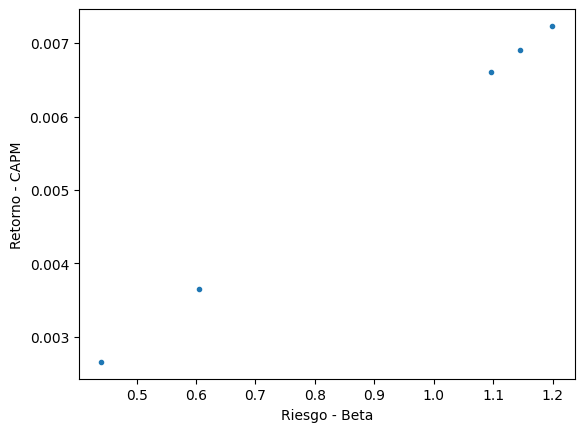

In [ ]:
plt.plot(grafica["Betas"], grafica["CAPM"],".")
plt.xlabel("Riesgo - Beta")
plt.ylabel("Retorno - CAPM")
plt.show();

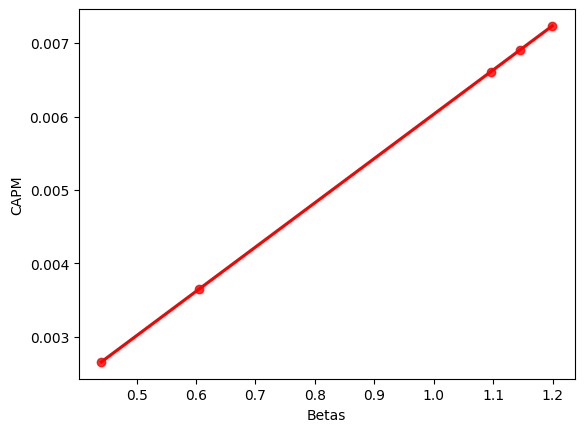

In [ ]:
import seaborn as sns
sns.regplot(x=grafica["Betas"],y=grafica["CAPM"],color ='r')
plt.show;

# **Punto 2**

In [ ]:
activos_2 = ("V","MSFT","JNJ","DIS","MCD")
precios_2 = yf.download(activos_2, start = '2017-12-01', end = '2022-12-31', interval = '1Mo')['Adj Close']
retornos_2 = np.log(precios_2/precios_2.shift()).dropna()
retornos_2.head()

[*********************100%***********************]  5 of 5 completed


,DIS,JNJ,MCD,MSFT,V
Date,,,,,
2018-01-01,0.018744,-0.011011,-0.005710,0.104998,0.085761
2018-02-01,-0.052035,-0.062019,-0.081534,-0.013137,-0.010438
2018-03-01,-0.026721,-0.007027,-0.002353,-0.022336,-0.025637
2018-04-01,-0.001096,-0.013038,0.068336,0.024353,0.058921
2018-05-01,-0.008609,-0.055843,-0.045389,0.055327,0.029816


In [ ]:
cov = retornos_2.cov()
cov

,DIS,JNJ,MCD,MSFT,V
DIS,0.008594,0.001728,0.002368,0.002898,0.004167
JNJ,0.001728,0.002620,0.001488,0.001354,0.001644
MCD,0.002368,0.001488,0.003057,0.001349,0.002314
MSFT,0.002898,0.001354,0.001349,0.003777,0.002328
V,0.004167,0.001644,0.002314,0.002328,0.004618


In [ ]:
mu = retornos_2.mean()
mu

DIS    -0.002953
JNJ     0.006112
MCD     0.009071
MSFT    0.018183
V       0.010547
dtype: float64

In [ ]:
vol = retornos_2.std()
vol

DIS     0.092705
JNJ     0.051181
MCD     0.055288
MSFT    0.061457
V       0.067957
dtype: float64

In [ ]:
n = len(activos_2)
unos = np.repeat(1,n)
wpmg = np.linalg.solve(cov,unos)/sum(np.linalg.solve(cov,unos))
wpmg

array([-0.04734412,  0.43891993,  0.33667818,  0.27128873,  0.00045729])

In [ ]:
import cvxpy as cp 
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x,cov))
restricciones = [x@mu == 1, x>=0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()
wpt


array([4.71832493e-21, 2.97991330e-21, 1.83438602e-01, 8.16561398e-01,
       3.97524311e-21])

In [ ]:
wpt.sum()

1.0

In [ ]:
rpt = wpt @ mu
print('El retorno del portafolio tanjente es  ', rpt, '.')

El retorno del portafolio tanjente es   0.016511208127792838 .


In [ ]:
sigmapt = np.sqrt(wpt.T@cov@wpt)
print('El riesgo del portafolio tanjente es  ', sigmapt, '.')

El riesgo del portafolio tanjente es   0.05500290199653758 .


### **A**

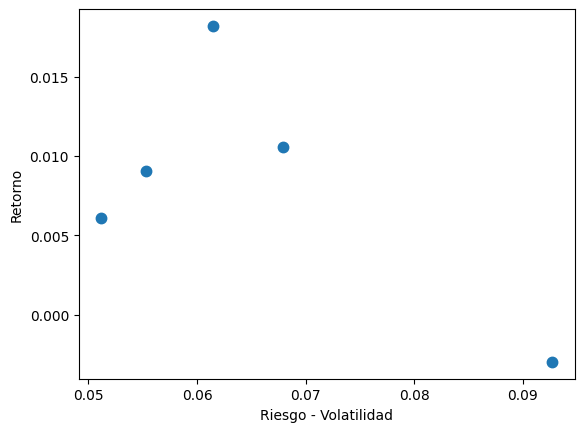

In [ ]:
plt.plot(vol,mu,".",markersize=15)
plt.xlabel("Riesgo - Volatilidad")
plt.ylabel("Retorno")
plt.show;

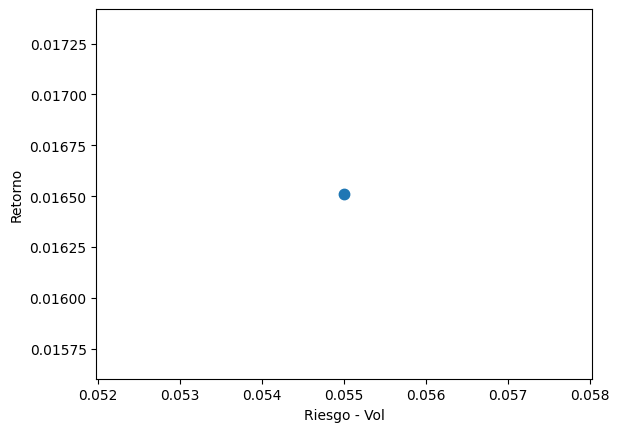

In [ ]:
plt.plot(sigmapt,rpt,".",markersize=15)
plt.xlabel("Riesgo - Vol")
plt.ylabel("Retorno")
plt.show;

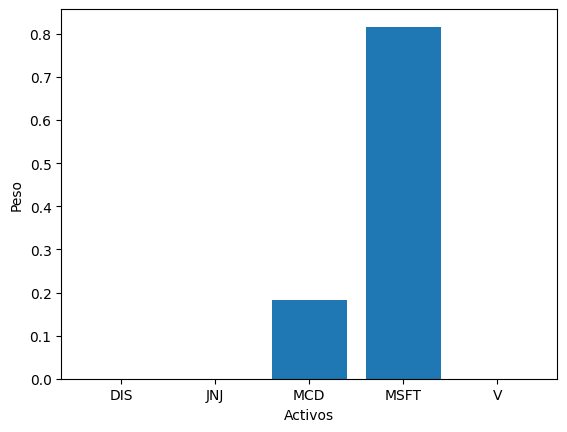

In [ ]:
plt.bar(cov.index,wpt)
plt.xlabel("Activos")
plt.ylabel("Peso")
plt.show;

### **B**

In [ ]:
# VaR Paramétrico 
alpha = 0.05 
VaRp = rpt - norm.ppf(1-alpha)*sigmapt
print('La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 95% es ', VaRp, '.')


La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 95% es  -0.07396051471406836 .


In [ ]:
# VaR Paramétrico  
alpha = 0.01 
VaRp = rpt - norm.ppf(1-alpha)*sigmapt 
print('La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 99% es ', VaRp, '.')

La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 99% es  -0.1114446759979291 .


### **C**

In [ ]:
# VaR Hístorico 
VaRHist_1 = np.percentile(retornos_2,5) 
print('La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 95% es ', VaRHist_1, '.')

La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 95% es  -0.09732953240347364 .


In [ ]:
# VaR Hístorico 
VaRHist_2 = np.percentile(retornos_2,1) 
print('La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 99% es ', VaRHist_2, '.')


La Máxima perdida probable que puede experimentar el portafolio a nivel mensual, con un nivel de confianza del 99% es  -0.16188969913641083 .


### **D**

In [ ]:
distribution_1 = np.random.normal(rpt,sigmapt,10000) 
probabilidad_1 = np.percentile(distribution_1,5)
print('El VaR de simulación del portafolio a nivel mensual, con un nivel de confianza del 95% es ', probabilidad_1, '.')

El VaR de simulación del portafolio a nivel mensual, con un nivel de confianza del 95% es  -0.07535091384568508 .


In [ ]:
distribution_2 = np.random.normal(rpt,sigmapt,10000) 
probabilidad_2 = np.percentile(distribution_2,1)
print('El VaR de simulación del portafolio a nivel mensual, con un nivel de confianza del 99% es ', probabilidad_2, '.')

El VaR de simulación del portafolio a nivel mensual, con un nivel de confianza del 99% es  -0.10968957517207703 .


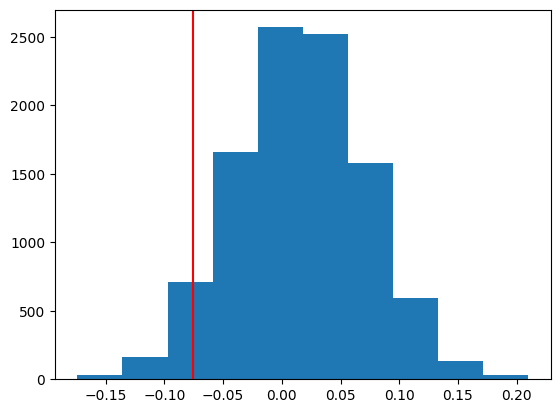

In [ ]:
plt.hist(distribution_1)
plt.axvline(probabilidad_1, color='r', label='VaR de Simulación del Portafolio')
plt.show;

### **E**

Después de calcular tanto el VaR párametrico como el VaR de simulación para un nivel de confianza del 95%, se logró observar que no existen diferencias significativas, esta es de aproximadamente 0.00198. Por lo que se puede afirmar que la estimación a partir de el método de Monte Carlo es un modelo fiable. Asimismo, vale la pena mencionar que esto se debe, a su vez, porque se utilizo una muestra aleatoria de 10.000 portafolios. Puesto que a una mayor cantida de muestra los resultados son aún más confiables

# **Punto 3**

In [ ]:
precios = yf.download("GM",start="2016-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos= np.log(precios/precios.shift()).dropna()
retornos

[*********************100%***********************]  1 of 1 completed


Date
2017-01-01    0.060345
2017-02-01    0.006263
2017-03-01   -0.041003
2017-04-01   -0.010393
2017-05-01   -0.020709
                ...   
2022-08-01    0.052382
2022-09-01   -0.172272
2022-10-01    0.201407
2022-11-01    0.032831
2022-12-01   -0.187067
Name: Adj Close, Length: 72, dtype: float64

### **A**

Text(0.5, 0, 'Tiempo')

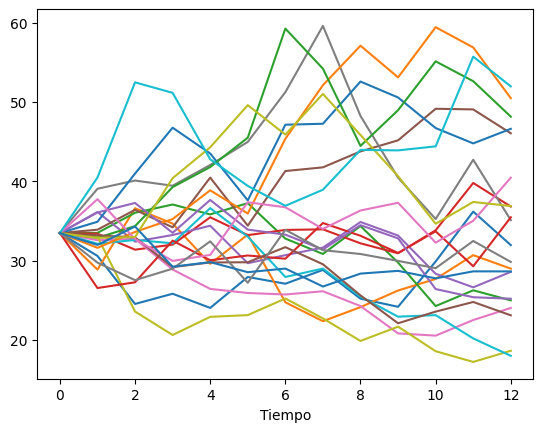

In [ ]:
mu=retornos.mean()*12
sigma=retornos.std()*np.sqrt(12)
def PathsGBM(S0,mu,sigma,T,NS,M):     
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S
T=1 
S0 =precios[-1]
NS = 10000 #Número de trayectorias
M = 12 # Partición del año en meses
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.plot(np.transpose(St[0:21,:])) 
plt.xlabel("Tiempo")

### **B**

El valor actual es  33.487335205078125  y el valor promedio proyectado es  34.02860827364151  por lo cual lo mejor es comprar para ganar el spread.


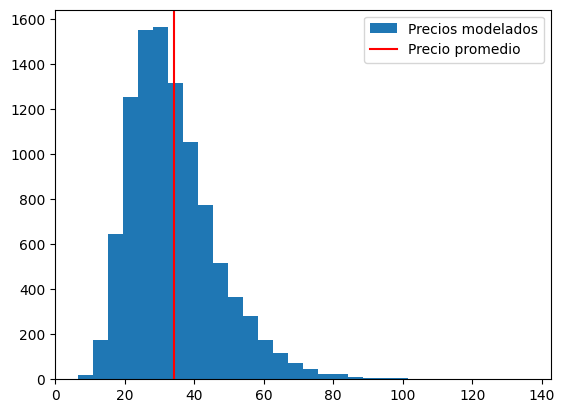

In [ ]:
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();
print('El valor actual es ', S0,' y el valor promedio proyectado es ',St[:,-1].mean(),' por lo cual lo mejor es comprar para ganar el spread.')

### **C**

In [ ]:
print(S0*np.exp(mu*T),"es practicamente igual a ", St[:,-1].mean())

34.117759899176896 es practicamente igual a  34.02860827364151


### **D**

In [ ]:
d=St[:,-1]
print('La probabilidad de que el activo esté por debajo del valor actual es',len(d[d<S0])/NS)

La probabilidad de que el activo esté por debajo del valor actual es 0.5537


# **Punto 4**

### **A**

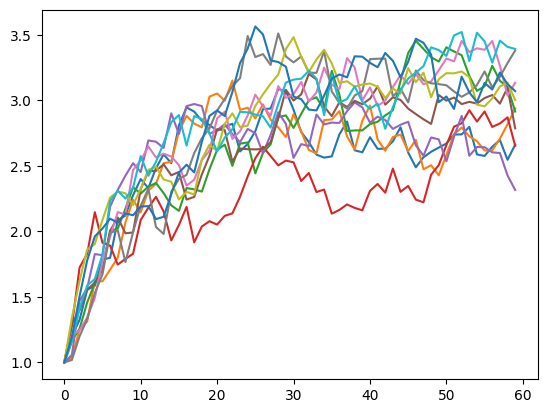

In [ ]:
t0 = 1
T = 5 # Año
n=100 #NS
M=60
dt = T/M #es igual a dt
k = 1 
mu = 3
sigma = 0.3
steps=60
X0=1#Y SERÁ IGUAL A X


t = np.linspace(t0,T,steps) # time axis

x = np.zeros((n,steps))
x[:,0]=t0
sigma_bis = sigma * np.sqrt(2/k)
sqrtdt = np.sqrt(dt)
for i in range(steps - 1):
  for w in range(n-1):
    x[w,i + 1] = x[w,i] + dt * (-(x[w,i] - mu) / k) + \
        sigma_bis * sqrtdt * np.random.randn()
x=pd.DataFrame(x)

x
#gráfico
plt.plot(np.transpose(x[0:11]));

### **B**

In [ ]:
# Aplicación ecuación del enunciado
print('En promedio el valor será ',x[59].mean(),' por lo que es mayor al último valor conocido.','La varianza no es ',x[59].std()**2)
print(',por lo cual, la volatilidad no es alta siendo confiable el valor promedio.')

En promedio el valor será  2.92583990884262  por lo que es mayor al último valor conocido. La varianza no es  0.19080507413316994
,por lo cual, la volatilidad no es alta siendo confiable el valor promedio.


### **C**

Distribución normal


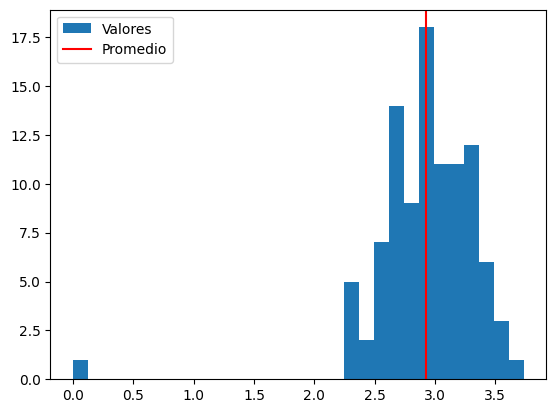

In [ ]:
# Histograma última columna
plt.hist(x[59], bins=30, label='Valores')
plt.axvline(x[59].mean(), color='r', label='Promedio')
plt.legend();

El proceso de Ornstein-Uhlenbeck es un tipo de proceso estocástico que se utiliza para modelar la dinámica de precios de algunos activos financieros. La distribución de probabilidad de este proceso es de tipo normal, es decir media cero y desviación 1, asimismo, continua y simétrica en forma de campana. Algunas de sus caracteristicas son que el 68% de los datos se encuentran dentro de una desviación estándar de la media, el 95% de los datos se encuentran dentro de dos desviaciones estándar de la media y el 99.7% de los datos se encuentran dentro de tres desviaciones estándar de la media.

### **D**

In [ ]:
t0 = 0.03
T = 1 # Año
n=100 #NS
M=12#cual es este?
dt = T/M #es igual a dt
k = 1
mu = 0.05
sigma = 0.15
steps=12#cual es este?
X0=0.03

t = np.linspace(t0,T,steps) # time axis

x = np.zeros((n,steps))
x[:,0]=t0

sigma_bis = sigma * np.sqrt(2/k)
sqrtdt = np.sqrt(dt)
for i in range(steps - 1):
  for w in range(n-1):
    x[w,i + 1] = x[w,i] + dt * (-(x[w,i] - mu) / k) + \
        sigma_bis * sqrtdt * np.random.randn()
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.03,0.032048,0.130132,0.135794,0.088719,0.031893,0.038403,0.084434,0.149638,0.186593,0.107579,0.174674
1,0.03,0.088425,0.023043,-0.023177,-0.084217,-0.188809,-0.202301,-0.156671,0.007440,0.149960,0.150447,0.143109
2,0.03,0.040524,0.017494,-0.002835,-0.076169,0.068166,-0.066376,-0.131539,-0.060318,-0.017209,-0.016606,-0.106664
3,0.03,0.163367,0.135722,-0.069050,-0.089011,-0.101437,-0.143727,-0.184978,-0.050500,-0.062547,-0.011506,0.011020
4,0.03,0.012766,0.021032,-0.051383,0.069069,0.124928,0.058257,-0.073566,-0.052931,-0.080741,-0.088963,-0.040404
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.03,-0.091631,-0.149674,-0.250119,-0.225476,-0.208241,-0.152772,-0.087676,-0.169649,-0.174090,-0.133671,-0.050297
96,0.03,0.058254,-0.022079,-0.052913,0.030214,0.010477,0.050543,0.072637,0.046317,0.150606,0.107210,0.186288
97,0.03,-0.015732,-0.069612,0.088762,0.186312,0.194256,0.183053,0.171312,0.063341,0.023655,0.032106,0.023079
98,0.03,0.053465,0.023075,-0.019274,-0.065946,-0.065333,-0.076415,-0.074273,-0.070069,0.043519,-0.013458,-0.015779


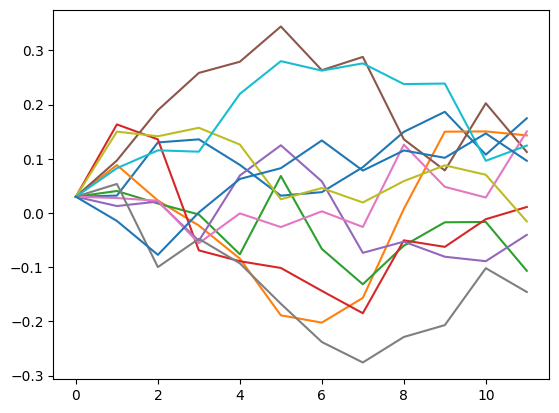

In [ ]:
plt.plot(np.transpose(x[0:11]));

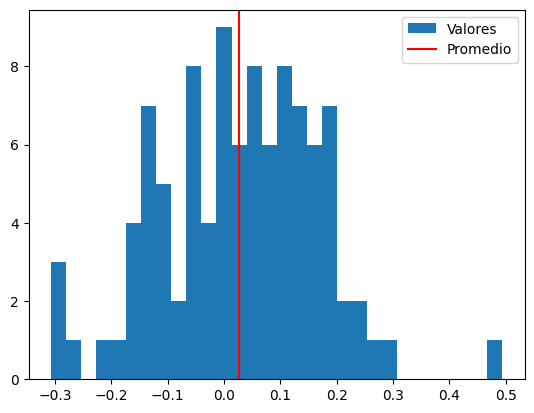

In [ ]:
plt.hist(x[11], bins=30, label='Valores')
plt.axvline(x[11].mean(), color='r', label='Promedio')
plt.legend();

In [ ]:
d=x[11]
print('La probabilidad de que las tasas bajen será de ',len(d[d<t0])/n,' por lo cual, el nominal subiría y sería recomendable comprar el bono.')

La probabilidad de que las tasas bajen será de  0.48  por lo cual, el nominal subiría y sería recomendable comprar el bono.


# **Punto 5**

In [ ]:
activos=['GC=F','BZ=F','^IRX','EURUSD=X','GBPUSD=X','KC=F','NG=F','HG=F']
precios = yf.download(activos,start="2005-01-01",end="2022-12-31",interval="1Mo")["Adj Close"].dropna()
retornos= np.log(precios/precios.shift()).dropna()
retornos

[*********************100%***********************]  8 of 8 completed


,BZ=F,EURUSD=X,GBPUSD=X,GC=F,HG=F,KC=F,NG=F,^IRX
Date,,,,,,,,
2007-09-01,0.085394,0.045007,0.014078,0.098681,0.062365,0.132810,0.228251,-0.075458
2007-10-01,0.135188,0.014054,0.016481,0.064135,-0.045792,-0.058417,0.192699,0.031918
2007-11-01,-0.026498,0.015356,-0.011168,-0.012451,-0.093956,0.037206,-0.131715,-0.218573
2007-12-01,0.061411,-0.006475,-0.034664,0.065202,-0.040895,0.078239,0.024485,0.022545
2008-01-01,-0.017629,0.017914,0.002008,0.099992,0.082008,0.014216,0.076015,-0.518284
...,...,...,...,...,...,...,...,...
2022-08-01,-0.131132,-0.019947,-0.043651,-0.028831,-0.018445,0.096063,0.103573,0.218782
2022-09-01,-0.092557,-0.019694,-0.042963,-0.029867,-0.021982,-0.076234,-0.299327,0.106060
2022-10-01,0.075204,0.012681,0.037474,-0.016069,-0.008314,-0.220552,-0.062668,0.223144


### **A**

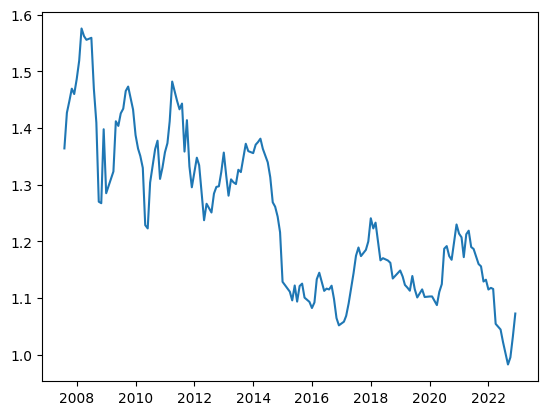

In [ ]:
plt.plot(precios['EURUSD=X']);

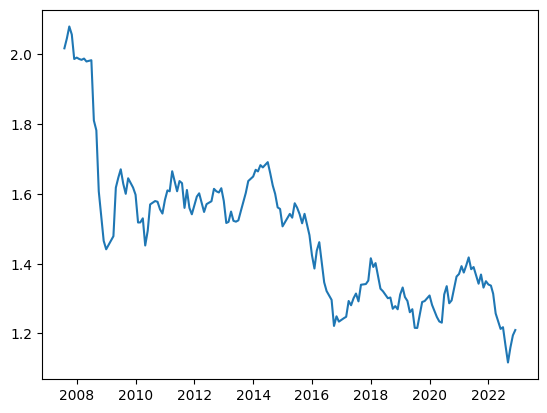

In [ ]:
plt.plot(precios['GBPUSD=X']);

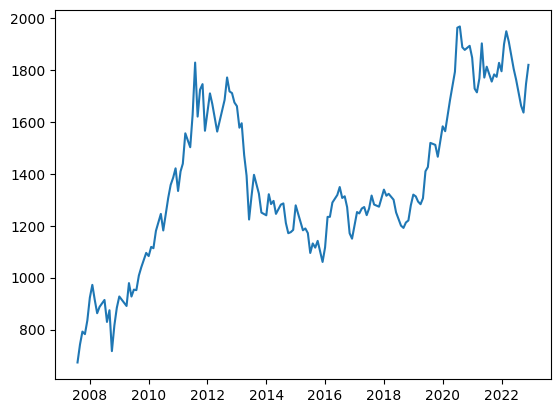

In [ ]:
plt.plot(precios['GC=F']);

### **B**

In [ ]:
pruebadf1 = adfuller(precios['EURUSD=X'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value)) 

ADF test: -1.592848
P-value: 0.487185
Citical values:
	1%: -3.472431
	5%: -2.880013
	10%: -2.576619


In [ ]:
pruebadf1 = adfuller(precios['GBPUSD=X'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value)) 

ADF test: -2.257668
P-value: 0.185985
Citical values:
	1%: -3.472431
	5%: -2.880013
	10%: -2.576619


In [ ]:
pruebadf1 = adfuller(precios['GC=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value)) 

ADF test: -1.914984
P-value: 0.325046
Citical values:
	1%: -3.472431
	5%: -2.880013
	10%: -2.576619


### **C**

Se procede a estimar según el modelo correspondiente

0.4 es la probabilidad de que los futuros del oro caigan en 2023 por debajo del nivel actual


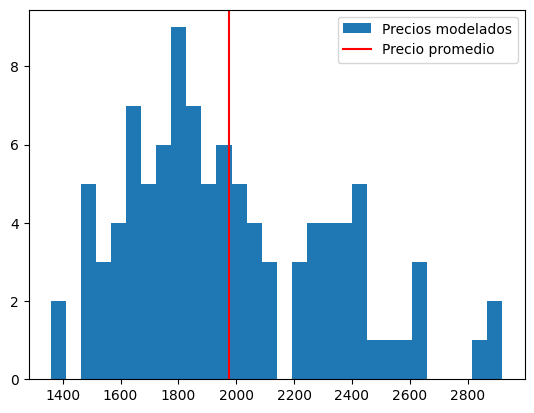

In [ ]:
mu=retornos['GC=F'].mean()*12
sigma=retornos['GC=F'].std()*np.sqrt(12)
T=1 
activo=precios['GC=F']
S0 =activo[-1]
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();
d=St[:,-1]
print(len(d[d<S0])/NS,'es la probabilidad de que los futuros del oro caigan en 2023 por debajo del nivel actual')

0.62 es la probabilidad de que el par libra esterlina-dolar caiga en 2023 por debajo del nivel actual


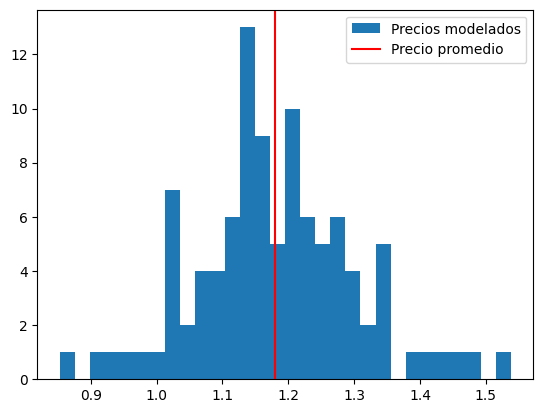

In [ ]:
mu=retornos['GBPUSD=X'].mean()*12
sigma=retornos['GBPUSD=X'].std()*np.sqrt(12)
T=1 
activo=precios['GBPUSD=X']
S0 =activo[-1]
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();
d=St[:,-1]
print(len(d[d<S0])/NS,'es la probabilidad de que el par libra esterlina-dolar caiga en 2023 por debajo del nivel actual')

0.58 es la probabilidad de que el par libra esterlina-dolar caiga en 2023 por debajo del nivel actual


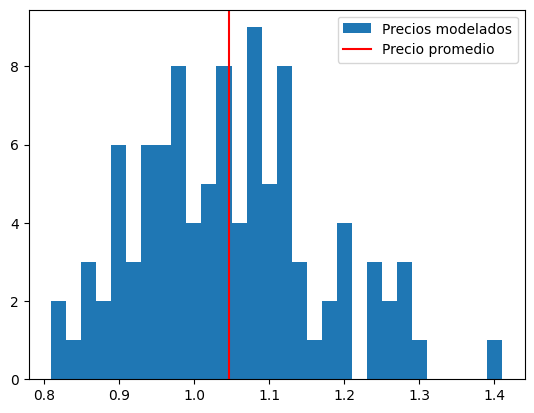

In [ ]:
mu=retornos['EURUSD=X'].mean()*12
sigma=retornos['EURUSD=X'].std()*np.sqrt(12)
T=1 
activo=precios['EURUSD=X']
S0 =activo[-1]
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();
d=St[:,-1]
print(len(d[d<S0])/NS,'es la probabilidad de que el par libra esterlina-dolar caiga en 2023 por debajo del nivel actual')

In [ ]:
print('Lo mejor es hacer un largo en el futuro del oro, comprar la libra esterlina y mantener euros o dolares para el último caso.')

Lo mejor es hacer un largo en el futuro del oro, comprar la libra esterlina y mantener euros o dolares para el último caso.
